In [1]:
#导入所需包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入Basket和Item表,并显示前5行
myData1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv', encoding="gbk")
myData2=pd.read_csv('item-2018-06-01-2018-07-05.csv', encoding="gbk")

print(myData1.head(5))
print(myData2.head(5))

  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007       1     161068        16.8
3    2018-06-01       D007       8       5325        30.4
4    2018-06-01       D007       8       5361       191.3
        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0         

In [10]:
#检验是否有缺失值
print(myData1.isnull().any())
print("*"*30)
print(myData2.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool
******************************
SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


In [17]:
# 根据STORE_CODE统计销售额
sell1 =myData1.groupby(by="STORE_CODE")
sell_groupby_STORE_CODE = sell1["BASK_SPEND"].sum()
sell_groupby_STORE_CODE

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

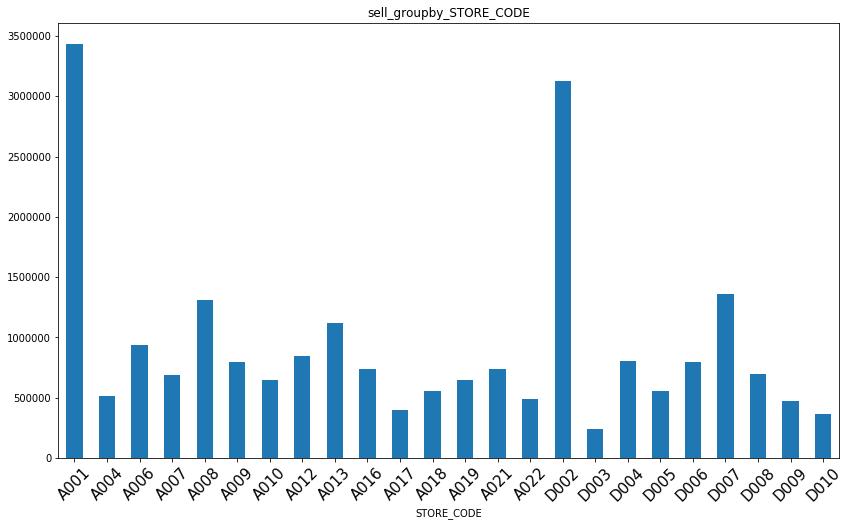

In [24]:
#根据STORE_CODE统计销售额
sell_groupby_STORE_CODE.plot(kind='bar',title='sell_groupby_STORE_CODE',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

In [18]:
#根据SHOP_DATETIME统计总销售额
sell2 =myData1.groupby(by="SHOP_DATETIME")
sell_groupby_SHOP_DATETIME = sell2["BASK_SPEND"].sum()
sell_groupby_SHOP_DATETIME

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

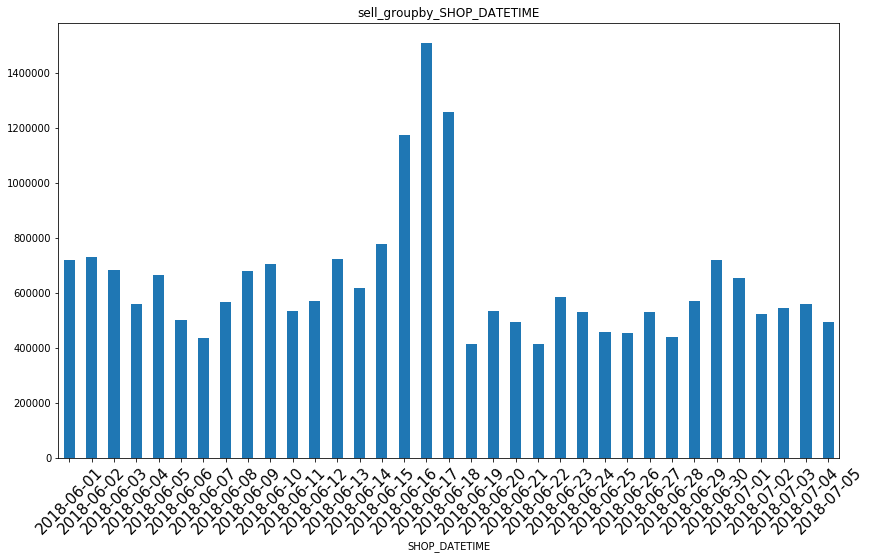

In [22]:
#绘制根据不同的日期，每日销量总数的柱状图
Bask_spend_dt=myData1['BASK_SPEND'].groupby(myData1['SHOP_DATETIME']).sum()
plt.rcParams['axes.unicode_minus'] = False
Bask_spend_dt.plot(kind='bar',title='sell_groupby_SHOP_DATETIME',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)